# BERT Masked LM on PerSent

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip3 install textattack[tensorflow]
!pip3 install evaluate
!pip3 install bert-tensorflow
!pip3 install contractions
!pip3 install tqdm
!pip3 install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 418 kB 31.4 MB/s 
     |████████████████████████████████| 60 kB 8.6 MB/s 
     |████████████████████████████████| 769 kB 63.9 MB/s 
     |████████████████████████████████| 3.6 MB 36.0 MB/s 
     |████████████████████████████████| 41.4 MB 1.1 MB/s 
     |████████████████████████████████| 401 kB 75.4 MB/s 
     |████████████████████████████████| 5.8 MB 51.9 MB/s 
     |████████████████████████████████| 365 kB 81.1 MB/s 
     |████████████████████████████████| 125 kB 82.1 MB/s 
     |████████████████████████████████| 5.8 MB 67.6 MB/s 
     |████████████████████████████████| 125 kB 79.4 MB/s 
     |████████████████████████████████| 511.7 MB 27 kB/s 
     |████████████████████████████████| 212 kB 80.7 MB/s 
     |████████████████████████████████| 182 kB 65.1 MB/s 
     |████████████████████████████████| 95 kB 5.3 MB/s 
     |█████████████████████████████

In [15]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, BertForSequenceClassification

# Set the device to run on (e.g. GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the BERT model for masked language modeling
model_lm = BertForMaskedLM.from_pretrained("bert-base-uncased")

# Add a new output layer for predicting sentiment
num_labels = 3  # positive, negative and neutral
model_lm.classifier = torch.nn.Linear(model_lm.config.hidden_size, num_labels)

model_lm.to(device)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [3]:
data_path = "/content/gdrive/MyDrive/NLP_Project/train.txt"

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(data_path)
data.head(5)

,DOCUMENT_INDEX,TITLE,TARGET_ENTITY,DOCUMENT,MASKED_DOCUMENT,TRUE_SENTIMENT,Paragraph0,Paragraph1,Paragraph2,Paragraph3,...,Paragraph6,Paragraph7,Paragraph8,Paragraph9,Paragraph10,Paragraph11,Paragraph12,Paragraph13,Paragraph14,Paragraph15
0,1,German bank LBBW wins EU bailout approval,Landesbank Baden Wuertemberg,Germany's Landesbank Baden Wuertemberg won EU ...,[TGT] won EU approval Tuesday for a state bail...,Negative,Positive,Negative,Negative,Neutral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8th LD Writethru: 9th passenger released from ...,Rolando Mendoza,The Philippine National Police (PNP) identifie...,The Philippine National Police (PNP) identifie...,Neutral,Neutral,Neutral,Neutral,Neutral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Commission: Bar Liberian president from office,Charles Taylor,Sirleaf 70 acknowledged before the commissio...,Sirleaf 70 acknowledged before the commissio...,Negative,Neutral,Neutral,Neutral,Negative,...,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AP Exclusive: Network flaw causes scary Web error,Sawyers,Sawyer logged off and asked her sister Mari ...,[TGT] logged off and asked [TGT] sister Mari ...,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Holyfield ' s wife says boxer hit her several ...,Candi Holyfield,Candi Holyfield said in the protective order t...,[TGT] said in the protective order that the ab...,Neutral,Neutral,Neutral,Neutral,Neutral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import tqdm

In [7]:
class InputExample(object):
    """
        Training / test example for masked word prediction and author sentiment classification.
    """

    def __init__(self, masked_sentence, original_sentence, sentiment):
        """
        Construct and InputExample

        Args:
            masked_sentence (str): 
                A string containing the input article with target_entity masked.

            original_sentence (str): 
                A string containing the input article with no masks.

            sentiment (str):
                Author's sentiment
        """
        self.masked_sentence = masked_sentence
        self.original_sentence = original_sentence
        self.sentiment = sentiment

In [8]:
def convert_text_to_examples(masked_texts, original_texts, labels):
    """
        Create InputExamples.
    """
    InputExamples = []

    for masked_text, original_text, label in zip(masked_texts, original_texts, labels):
        InputExamples.append(
            InputExample(masked_text, original_text, label)
        )
    return InputExamples

In [9]:
input_examples = convert_text_to_examples(data['MASKED_DOCUMENT'], data['DOCUMENT'], data['TRUE_SENTIMENT'])

In [82]:
def align_os_to_ms(tokenized_os, tokenized_ms):
    l_os = []
    l_ms = []
    
    ms_index = 0
    os_index = 0

    while (os_index < len(tokenized_os)) and (ms_index < len(tokenized_ms)):
        if tokenized_ms[ms_index] == '[MASK]':
            l_os.append(tokenized_os[os_index])
            l_ms.append(tokenized_ms[ms_index])
            os_index += 1
            ms_index += 1
        elif tokenized_ms[ms_index] != tokenized_os[os_index]:
            l_ms.append('[MASK]')
            l_os.append(tokenized_os[os_index])
            os_index += 1
        else:
            l_ms.append(tokenized_ms[ms_index])
            l_os.append(tokenized_os[os_index])
            ms_index += 1
            os_index += 1

    while os_index < len(tokenized_os):
        l_ms.append('[MASK]')
        l_os.append(tokenized_os[os_index])
        os_index += 1

    return l_os, l_ms

def single_example_to_features(tokenizer, example, max_seq_length=256):
    """
        Converts a single 'InputExample' into a single 'InputFeatures'
    """
    example.masked_sentence = example.masked_sentence.replace('[TGT]', '[MASK]')

    tokens_masked = tokenizer.tokenize(example.masked_sentence)
    tokens_original = tokenizer.tokenize(example.original_sentence)

    tokens_original, tokens_masked = align_os_to_ms(tokens_original, tokens_masked)
    
    if len(tokens_masked) > max_seq_length - 2:
        tokens_masked = tokens_masked[:(max_seq_length-2)]
        tokens_original = tokens_original[:(max_seq_length-2)]

    tokens_masked = ['[CLS]'] + tokens_masked + ['[SEP]']
    tokens_original = ['[CLS]'] + tokens_original + ['[SEP]']
    segment_ids = [0] * len(tokens_masked)

    input_ids = tokenizer.convert_tokens_to_ids(tokens_masked)
    label_ids = tokenizer.convert_tokens_to_ids(tokens_original)
    input_mask = [1] * len(input_ids)

    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        label_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(label_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length
    
    return input_ids, label_ids, input_mask, segment_ids, example.sentiment

In [85]:
def examples_to_features(tokenizer, examples, max_seq_length=256):
    input_ids, label_ids, input_masks, segment_ids, sentiments = [], [], [], [], []

    for example in tqdm.tqdm(examples, desc="Converting examples to features"):
        input_id, label_id, input_mask, segment_id, sentiment = single_example_to_features(tokenizer, example, max_seq_length)
        input_ids.append(input_id)
        label_ids.append(label_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        sentiments.append(sentiment)

    return (
        np.array(input_ids),
        np.array(label_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(sentiments).reshape(-1, 1)
    )

In [86]:
tokenized_examples = examples_to_features(tokenizer=tokenizer, 
                                          examples=input_examples, 
                                          max_seq_length=512)

Converting examples to features: 100%|██████████| 3355/3355 [00:51<00:00, 64.54it/s]


In [102]:
from transformers import BertTokenizer, TFBertForMaskedLM, BertForSequenceClassification
import tensorflow as tf
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [104]:
# Set the device to run on (e.g. GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the BERT model for masked language modeling
model = TFBertForMaskedLM.from_pretrained("bert-base-uncased")

# Add a new output layer for predicting sentiment
# num_labels = 3  # positive, negative and neutral
# model_lm.classifier = torch.nn.Linear(model_lm.config.hidden_size, num_labels)

# model_lm.to(device)

All model checkpoint layers were used when initializing TFBertForMaskedLM.

All the layers of TFBertForMaskedLM were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [105]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history = model.fit([tokenized_examples[0], tokenized_examples[2]], tokenized_examples[1], verbose=1, batch_size=8, epochs=2)

Epoch 1/2
420/420 [==============================] - 515s 1s/step - loss: 0.3694
Epoch 2/2
420/420 [==============================] - 486s 1s/step - loss: 0.2202


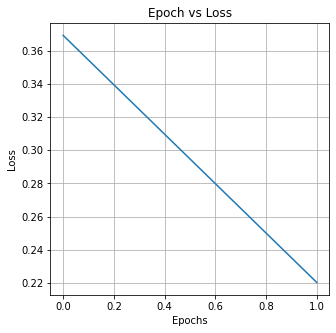

In [106]:
losses = history.history['loss']
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(losses)),losses)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Epoch vs Loss")
plt.grid()
plt.show()

In [113]:
model.save("/content/gdrive/MyDrive/NLP_Project/my_model")

In [116]:
model.config.to_json_file("/content/gdrive/MyDrive/NLP_Project/my_model/config.json")

In [120]:
model.save_pretrained("/content/gdrive/MyDrive/NLP_Project/my_model")

In [ ]:
# out = model(inp).logits[0].numpy()
# predicted_tokens = np.argmax(out[mask_loc],axis=1).tolist()
# tokenizer.decode(predicted_tokens)


In [108]:
from transformers import BertModel

In [122]:
new_model = BertModel.from_pretrained("/content/gdrive/MyDrive/NLP_Project/my_model", from_tf=True)

All TF 2.0 model weights were used when initializing BertModel.

All the weights of BertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [123]:
new_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [125]:
num_labels = 3
new_model.classifier = torch.nn.Linear(new_model.config.hidden_size, num_labels)

In [126]:
new_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          